In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../Data/injury_report_combined_years_v4.csv')
df.head()

,Name,Team,Pos,Injury / Surgery Date,Injury / Surgery,Status,IL Retro Date,Eligible to Return,Return Date,Latest Update,year
0,Chris Martin,BOS,RP,Jun '24,Anxiety,Activated,06/02/24,06/17/24,06/18/24,Activated,2024
1,Walker Buehler,LAD,SP,08/23/22,Tommy John surgery,Activated,03/17/24,04/07/24,05/06/24,Activated,2024
2,Shane Baz,TBR,SP,09/28/22,Tommy John surgery,Activated,03/25/24,04/09/24,05/23/24,Activated,2024
3,Lucas Gilbreath,COL,RP,03/14/23,Tommy John surgery,Activated,03/25/24,05/24/24,08/16/24,Activated,2024
4,Cade Cavalli,WSN,SP,03/22/23,Tommy John surgery,60-Day IL,03/28/24,05/27/24,NaN,No timetable for return,2024


In [4]:
injury_counts = df['Injury / Surgery'].value_counts().reset_index()
injury_counts.columns = ['Injury / Surgery', 'Frequency']
injury_counts

,Injury / Surgery,Frequency
0,Strained hamstring,307
1,Tommy John surgery,234
2,Strained oblique,219
3,Undisclosed,160
4,Shoulder inflammation,146
...,...,...
675,Cracked fingernail/blister,1
676,Cervical nerve impingement,1
677,Knee surgery (torn tendon),1
678,Thoracic outlet syndrome surgery (follow-up pr...,1


### Injury Frequency Bar Chart: Show the most common types of injuries among players.

In [5]:
top_injury_counts = df['Injury / Surgery'].value_counts().head(10).reset_index()
top_injury_counts.columns = ['Injury / Surgery', 'Frequency']
top_injury_counts

,Injury / Surgery,Frequency
0,Strained hamstring,307
1,Tommy John surgery,234
2,Strained oblique,219
3,Undisclosed,160
4,Shoulder inflammation,146
5,COVID-19,140
6,Strained groin,122
7,Strained shoulder,118
8,Elbow inflammation,110
9,COVID-19 (protocol),98


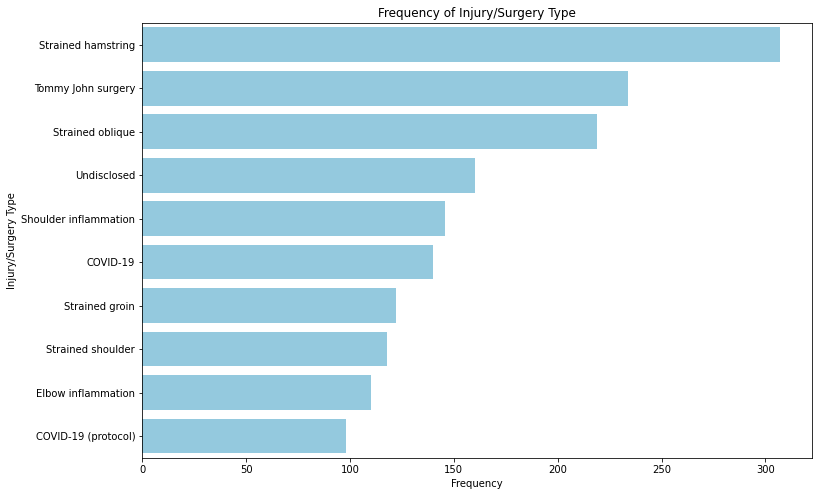

In [6]:
plt.figure(figsize=(12,8))
sns.barplot(x='Frequency', y='Injury / Surgery', data=top_injury_counts, color='skyblue')
plt.title('Frequency of Injury/Surgery Type')
plt.xlabel('Frequency')
plt.ylabel('Injury/Surgery Type')
plt.show()

### Heatmap of Injuries by Team and Year: Display which teams have the most injuries each year.

In [7]:
# Group the data by 'Team' and 'year' and count the number of injuries
injury_counts = df.groupby(['Team', 'year']).size().reset_index(name='Injury Count')

In [8]:
# Create a pivot table with teams as rows, years as columns, and injury counts as values
injury_pivot = injury_counts.pivot_table(index='Team', columns='year', values='Injury Count', fill_value=0)

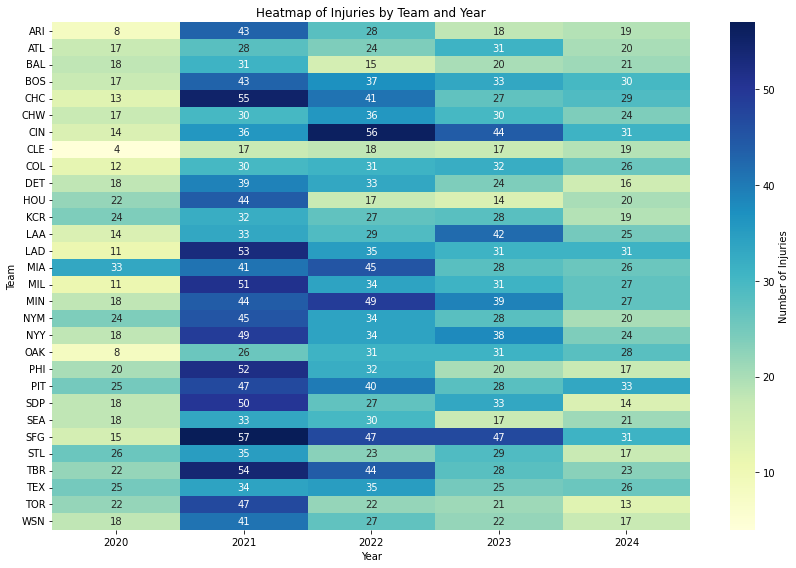

In [9]:
# Generate the heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(injury_pivot, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Number of Injuries'})
plt.title('Heatmap of Injuries by Team and Year')
plt.xlabel('Year')
plt.ylabel('Team')
plt.tight_layout()
plt.show()


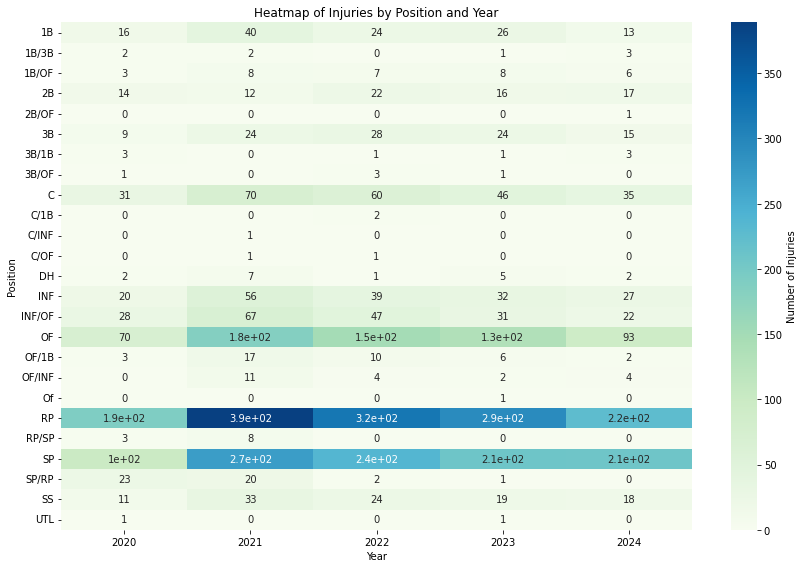

In [10]:

# Create a pivot table of injuries by Position and Year
injury_pivot = df.pivot_table(
    index='Pos',   # Change this column name if 'Position' is named differently
    columns='year',
    values='Injury / Surgery',  # Assuming this column identifies each injury
    aggfunc='count',  # Count the number of injuries
    fill_value=0
)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(injury_pivot, annot=True, cmap='GnBu', cbar_kws={'label': 'Number of Injuries'})
plt.title('Heatmap of Injuries by Position and Year')
plt.xlabel('Year')
plt.ylabel('Position')
plt.tight_layout()
plt.show()


### Frequency of Injuries Per Month Heatmap: Identify seasonal trends in when injuries occur.

In [11]:
# Convert the 'Injury / Surgery Date' to datetime format to extract the month
df['Injury Date'] = pd.to_datetime(df['Injury / Surgery Date'], errors='coerce')

# Extract the month from the injury date
df['Month'] = df['Injury Date'].dt.month


<ipython-input-11-5d7c4668813c>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Injury Date'] = pd.to_datetime(df['Injury / Surgery Date'], errors='coerce')


In [12]:
# Group the data by 'year' and 'Month' to count the number of injuries
monthly_injury_counts = df.groupby(['year', 'Month']).size().reset_index(name='Injury Count')

# Create a pivot table with years as rows and months as columns
monthly_pivot = monthly_injury_counts.pivot_table(index='year', columns='Month', values='Injury Count', fill_value=0)


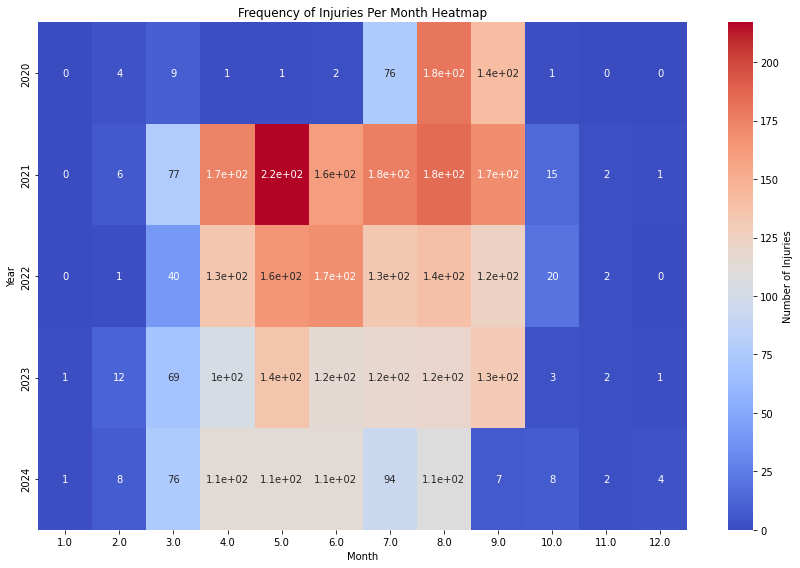

In [13]:
# Plot the heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_pivot, annot=True, cmap='coolwarm', cbar_kws={'label': 'Number of Injuries'})
plt.title('Frequency of Injuries Per Month Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


### Timeline of Injuries: A timeline showing injuries over time

In [14]:
# Filter data to include only injury dates from 2020 to 2024
filtered_timeline_data = df[
    (df['Injury Date'] >= '2020-01-01') & 
    (df['Injury Date'] <= '2024-12-31')
]


In [15]:
# Extract the month-year period from the filtered injury dates
filtered_timeline_data['Injury Month-Year'] = filtered_timeline_data['Injury Date'].dt.to_period('M')

# Count the number of injuries per month-year within the filtered date range
filtered_injuries_over_time = filtered_timeline_data.groupby('Injury Month-Year').size().reset_index(name='Injury Count')

# Convert 'Injury Month-Year' back to datetime for plotting
filtered_injuries_over_time['Injury Month-Year'] = filtered_injuries_over_time['Injury Month-Year'].dt.to_timestamp()


<ipython-input-15-359361b669df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_timeline_data['Injury Month-Year'] = filtered_timeline_data['Injury Date'].dt.to_period('M')


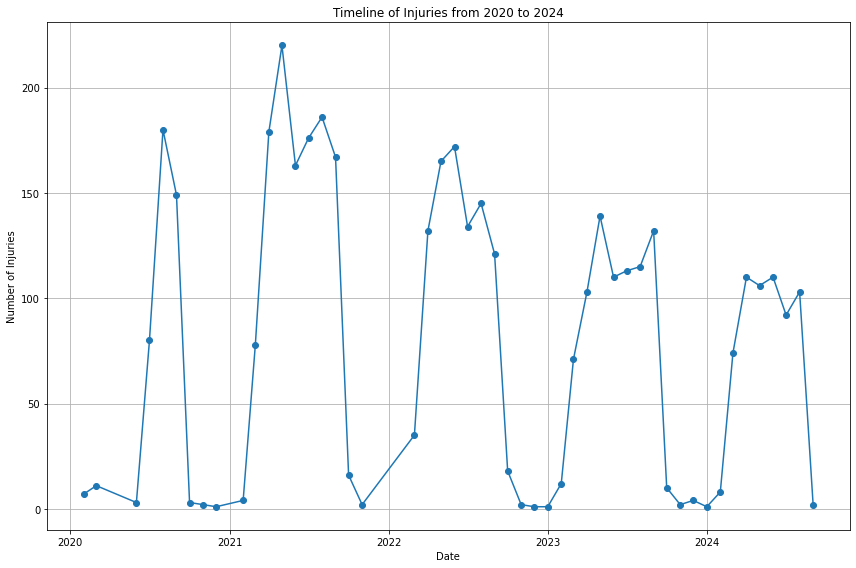

In [16]:
plt.figure(figsize=(12, 8))
plt.plot(filtered_injuries_over_time['Injury Month-Year'], filtered_injuries_over_time['Injury Count'], marker='o', linestyle='-')
plt.title('Timeline of Injuries from 2020 to 2024')
plt.xlabel('Date')
plt.ylabel('Number of Injuries')
plt.grid(True)
plt.tight_layout()
plt.show()


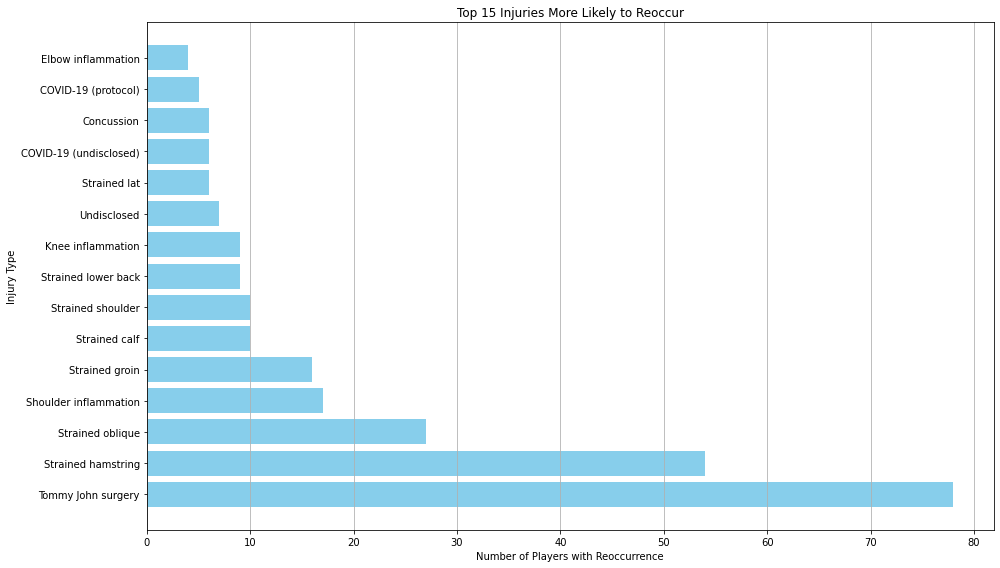

In [17]:
# Group by player name and injury type to identify reoccurring injuries per player
reoccurring_injuries = df.groupby(['Name', 'Injury / Surgery']).size().reset_index(name='Count')

# Filter for injuries that occur more than once for the same player
reoccurring_injuries = reoccurring_injuries[reoccurring_injuries['Count'] > 1]

# Aggregate by injury type to count how many players have had each injury multiple times
injury_reoccurrence_count = reoccurring_injuries.groupby('Injury / Surgery')['Name'].nunique().reset_index(name='Player Count')

# Sort and select the top 15 most common reoccurring injuries
top_15_reoccurrences = injury_reoccurrence_count.sort_values(by='Player Count', ascending=False).head(15)

# Plot the top 15 injuries more likely to happen again
plt.figure(figsize=(14, 8))
plt.barh(top_15_reoccurrences['Injury / Surgery'], top_15_reoccurrences['Player Count'], color='skyblue')
plt.title('Top 15 Injuries More Likely to Reoccur')
plt.xlabel('Number of Players with Reoccurrence')
plt.ylabel('Injury Type')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


In [18]:
combined_df = pd.read_csv('../Data/Cleaned_CombinedBPI.csv', encoding='ISO-8859-1')

# Define a mapping of keywords to broader categories
injury_categories = {
    'Shoulder': ['shoulder', 'rotator cuff', 'scapula', 'clavicle'],
    'Elbow': ['elbow', 'ulnar', 'biceps', 'triceps', 'forearm', 'tommy john'],
    'Knee': ['knee', 'acl', 'mcl', 'patella', 'meniscus'],
    'Back': ['back', 'spine', 'lumbar'],
    'Hand/Wrist': ['hand', 'wrist', 'thumb', 'finger'],
    'Leg/Ankle/Foot': ['leg', 'ankle', 'foot', 'achilles', 'calf', 'shin'],
    'Hip/Groin': ['hip', 'groin', 'pelvis'],
    'Neck': ['neck', 'cervical'],
    'Head/Face': ['concussion', 'head', 'face', 'jaw', 'eye'],
    'Torso': ['rib', 'chest', 'abdomen'],
    # Add more categories and keywords as needed
}

# Create a function to map injury names to categories
def categorize_injury(injury):
    if pd.isna(injury):
        return 'Unknown'
    injury = injury.lower()  # Convert to lowercase for matching
    for category, keywords in injury_categories.items():
        if any(keyword in injury for keyword in keywords):
            return category
    return 'Other'

# Apply the function to create a new column with broader categories
combined_df['Injury Category'] = combined_df['Injury / Surgery'].apply(categorize_injury)

# Display the updated DataFrame with the new category column
combined_df.head()


,player_id,year_x,player_age,hit,single,double,triple,home_run,strikeout,walk,...,Pos,Injury / Surgery Date,Injury / Surgery,Status,IL Retro Date,Eligible to Return,Return Date,Latest Update,year_y,Injury Category
0,408234,2020,37,51,37,4,0,10,51,24,...,1B,9/2/2022,Strained biceps,Activated,9/3/2022,9/13/2022,9/19/2022,Activated,2022.0,Elbow
1,408234,2020,37,51,37,4,0,10,51,24,...,1B,4/10/2021,Strained biceps,Activated,4/11/2021,4/21/2021,4/25/2021,Activated,2021.0,Elbow
2,443558,2020,39,56,34,6,0,16,58,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
3,444482,2020,32,61,45,10,1,5,45,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
4,446334,2020,34,49,31,10,1,7,39,11,...,3B,7/25/2023,Strained lower back,Activated,7/26/2023,8/5/2023,8/21/2023,Activated,2023.0,Back


In [19]:
# Convert the date columns to datetime format
combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')
combined_df['Return Date'] = pd.to_datetime(combined_df['Return Date'], errors='coerce')

# Calculate the number of days on the injured list (IL)
combined_df['Days on IL'] = (combined_df['Return Date'] - combined_df['Injury / Surgery Date']).dt.days

# Define a function to classify the severity of the injury based on days on IL
def determine_severity(days_on_il):
    if pd.isna(days_on_il) or days_on_il < 0:
        return 'Unknown'
    elif days_on_il <= 14:
        return 'Minor'
    elif 15 <= days_on_il <= 60:
        return 'Moderate'
    elif days_on_il > 60:
        return 'Severe'
    else:
        return 'Unknown'

# Apply the function to create a new column with injury severity
combined_df['Injury Severity'] = combined_df['Days on IL'].apply(determine_severity)

# Display the updated DataFrame with 'Days on IL' and 'Injury Severity' columns
combined_df.head()


,player_id,year_x,player_age,hit,single,double,triple,home_run,strikeout,walk,...,Injury / Surgery,Status,IL Retro Date,Eligible to Return,Return Date,Latest Update,year_y,Injury Category,Days on IL,Injury Severity
0,408234,2020,37,51,37,4,0,10,51,24,...,Strained biceps,Activated,9/3/2022,9/13/2022,2022-09-19,Activated,2022.0,Elbow,17.0,Moderate
1,408234,2020,37,51,37,4,0,10,51,24,...,Strained biceps,Activated,4/11/2021,4/21/2021,2021-04-25,Activated,2021.0,Elbow,15.0,Moderate
2,443558,2020,39,56,34,6,0,16,58,25,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,Unknown,NaN,Unknown
3,444482,2020,32,61,45,10,1,5,45,13,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,Unknown,NaN,Unknown
4,446334,2020,34,49,31,10,1,7,39,11,...,Strained lower back,Activated,7/26/2023,8/5/2023,2023-08-21,Activated,2023.0,Back,27.0,Moderate


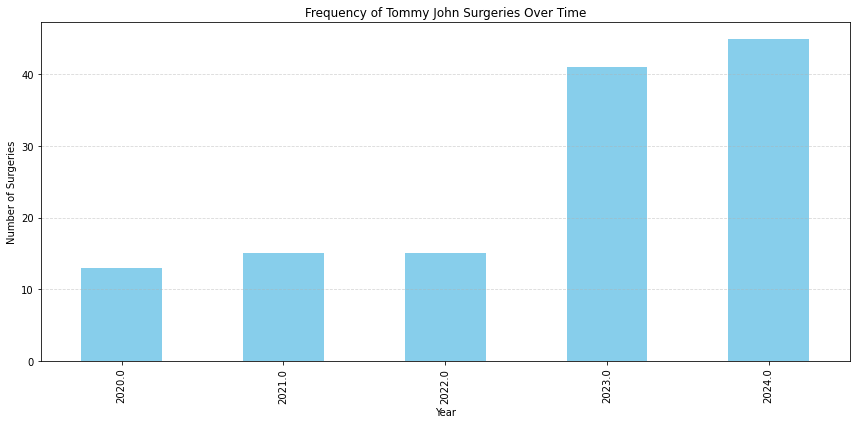

In [20]:
# Filter the dataset to include only Tommy John surgery cases
tommy_john_df = combined_df[combined_df['Injury / Surgery'].str.contains('tommy john', case=False, na=False)]

# Frequency of Tommy John Surgeries Over Time
plt.figure(figsize=(12, 6))
tommy_john_df['year_y'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Frequency of Tommy John Surgeries Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Surgeries')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

c:\Users\jacky\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


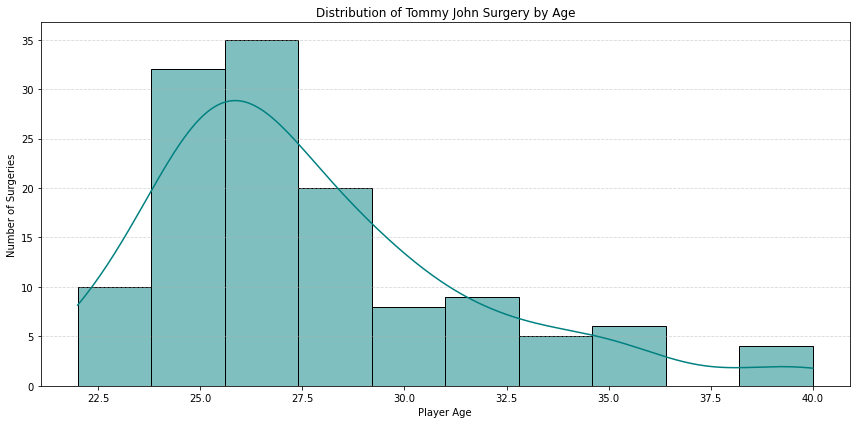

In [21]:
# Tommy John Surgery by Age
plt.figure(figsize=(12, 6))
sns.histplot(tommy_john_df['player_age'], bins=10, kde=True, color='teal')
plt.title('Distribution of Tommy John Surgery by Age')
plt.xlabel('Player Age')
plt.ylabel('Number of Surgeries')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

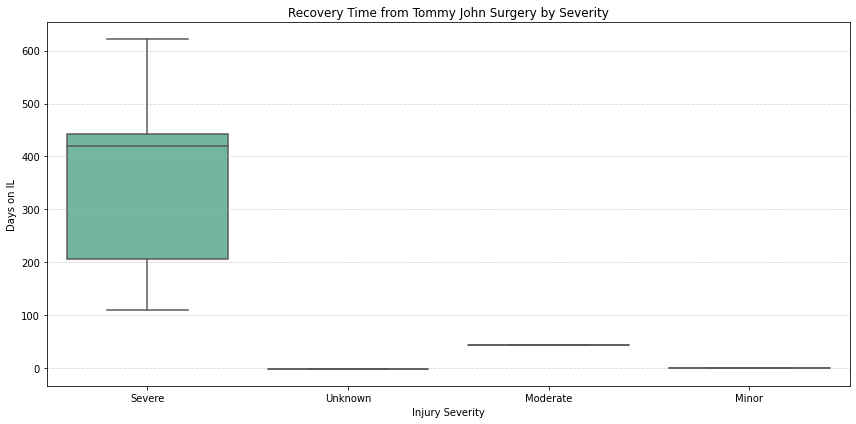

In [22]:
# Recovery Time from Tommy John Surgery
plt.figure(figsize=(12, 6))
sns.boxplot(data=tommy_john_df, x='Injury Severity', y='Days on IL', palette='Set2')
plt.title('Recovery Time from Tommy John Surgery by Severity')
plt.xlabel('Injury Severity')
plt.ylabel('Days on IL')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

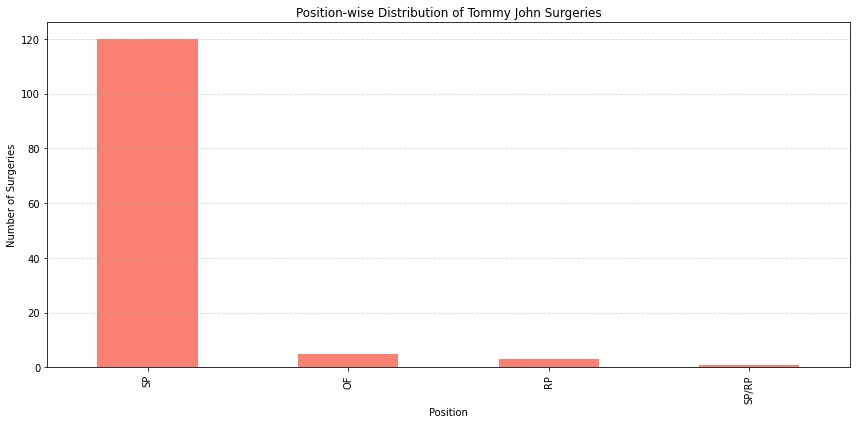

In [23]:
# Position-wise Distribution of Tommy John Surgeries
plt.figure(figsize=(12, 6))
tommy_john_df['Pos'].value_counts().plot(kind='bar', color='salmon')
plt.title('Position-wise Distribution of Tommy John Surgeries')
plt.xlabel('Position')
plt.ylabel('Number of Surgeries')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


c:\Users\jacky\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jacky\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


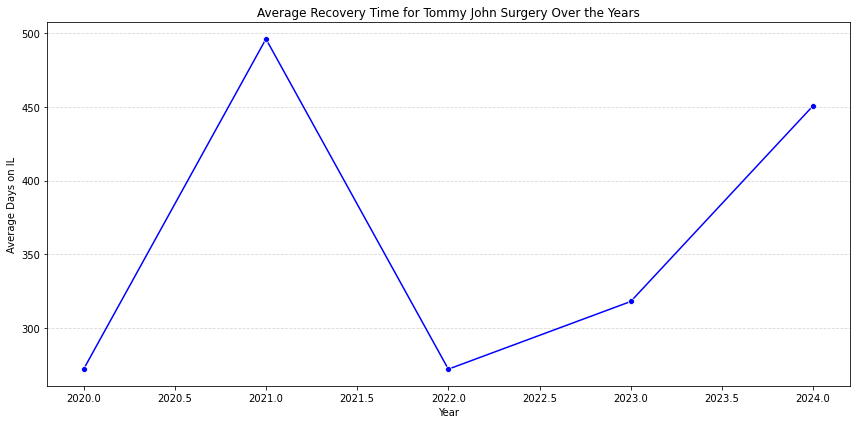

In [24]:
# Recovery Time Over the Years
plt.figure(figsize=(12, 6))
recovery_trend = tommy_john_df.groupby('year_y')['Days on IL'].mean().reset_index()
sns.lineplot(data=recovery_trend, x='year_y', y='Days on IL', marker='o', color='blue')
plt.title('Average Recovery Time for Tommy John Surgery Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Days on IL')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<ipython-input-25-9065dd7693ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tommy_john_df['Age Group'] = pd.cut(tommy_john_df['player_age'], bins=age_bins, labels=age_labels, right=False)
c:\Users\jacky\anaconda4\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


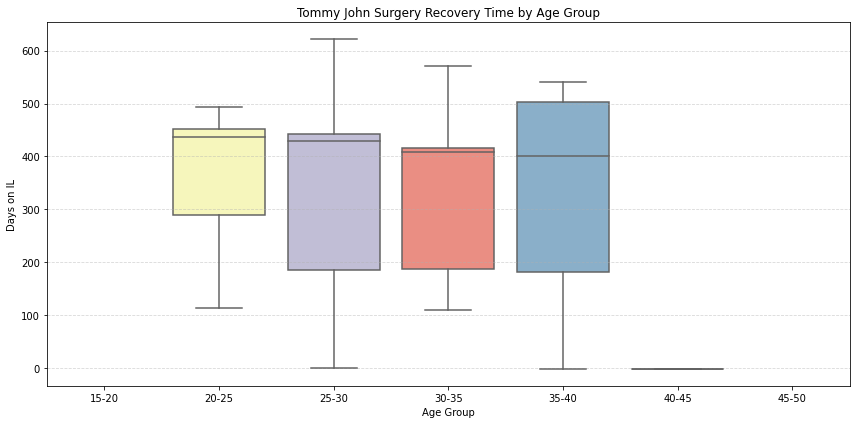

In [25]:
# Recovery Time by Age Group
plt.figure(figsize=(12, 6))
age_bins = [15, 20, 25, 30, 35, 40, 45, 50]
age_labels = ['15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50']
tommy_john_df['Age Group'] = pd.cut(tommy_john_df['player_age'], bins=age_bins, labels=age_labels, right=False)
sns.boxplot(data=tommy_john_df, x='Age Group', y='Days on IL', palette='Set3')
plt.title('Tommy John Surgery Recovery Time by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Days on IL')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

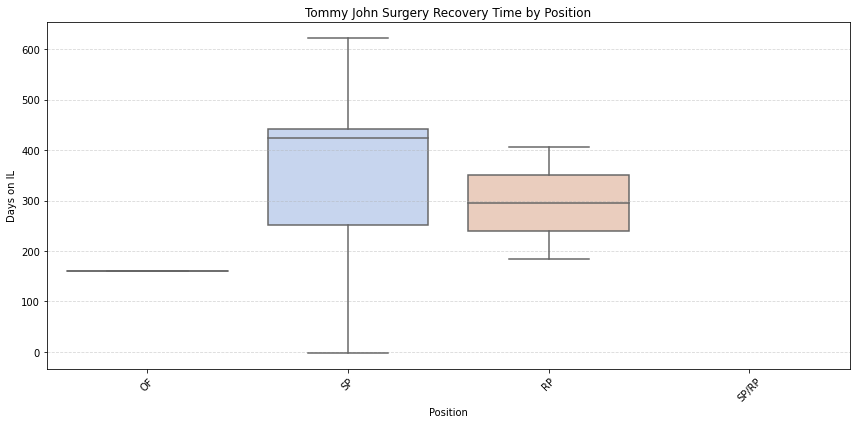

In [26]:
# Recovery Time by Position
plt.figure(figsize=(12, 6))
sns.boxplot(data=tommy_john_df, x='Pos', y='Days on IL', palette='coolwarm')
plt.title('Tommy John Surgery Recovery Time by Position')
plt.xlabel('Position')
plt.ylabel('Days on IL')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
